In [ ]:
# todownload opendateset

In [5]:
!pip install opendatasets --upgrade --quiet

In [ ]:
!pip install pydot
!pip install pydotplus


In [76]:
!nvidia-smi

Mon May 22 08:02:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.49       Driver Version: 528.49       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0    19W /  80W |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [66]:
# required package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt2
import os
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import (Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout)
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras import regularizers
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot

In [ ]:
#image size define 

In [3]:
image_dimensions = {'height':128, 'width':128, 'channels':3}

In [5]:
import opendatasets as od

In [9]:
dataset_url = "https://www.kaggle.com/xhlulu/140k-real-and-fake-faces"

In [10]:
import os

In [11]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: orgamer
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 3.75G/3.75G [05:57<00:00, 11.2MB/s]


In [12]:
dataset_url = "https://www.kaggle.com/sophatvathana/casia-dataset"

In [13]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: orgamer
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 5.22G/5.22G [08:35<00:00, 10.9MB/s]


In [ ]:
# we have combine casia-dataset and 140k-real-and-fake-faces 


In [14]:
path = 'C:/Users/atulp/Desktop/final ocr model file/image manipulation/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'

def plot_img(path, set_):
    dir_ = os.path.join(path, 'test', set_)
    k = 0
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    fig.suptitle(set_ + 'Faces')
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))          
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k +=1
  #  fig.tight_layout()
    plt.suptitle(set_ + ' Faces')
    return plt

In [67]:
# plot_img(path, 'fake').show()
# plot_img(path, 'real').show()

In [67]:
from pathlib import Path
import random
import cv2

In [53]:
#here  the divided dataset is loaded into  

In [17]:
bs = 64
row, col = 128, 128
path = 'C:/Users/atulp/Desktop/final ocr model file/image manipulation/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True
                                  )
training_set = train_datagen.flow_from_directory(path + '/train',
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 target_size=(row,col),
                                                 batch_size=bs
                                                )
val_test_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_test_datagen.flow_from_directory(path + '/valid',
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      target_size=(row,col),
                                                      batch_size=bs
                                                     ) 
test_set = val_test_datagen.flow_from_directory(path + '/test',
                                                class_mode='binary',
                                                shuffle=True,
                                                target_size=(row,col),
                                                batch_size=bs
                                               )
training_set.class_indices

Found 112614 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [69]:
#traning in multiple model one at cnn along with lstm and other  as cnn only 

In [18]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Reshape((512, 1)),  # Reshape for LSTM input
#     tf.keras.layers.LSTM(64),  # Add LSTM layer
#     tf.keras.layers.Dense(2, activation='softmax')
# ])


In [37]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(2, activation='softmax')
    ]
)


In [38]:
# model = tf.keras.models.Sequential(
#     [
#      tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (128, 128, 3)),
#      tf.keras.layers.MaxPooling2D(2,2),

#      tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#      tf.keras.layers.MaxPooling2D(2,2),

#      tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
#      tf.keras.layers.MaxPooling2D(2,2),

#      tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
#      tf.keras.layers.MaxPooling2D(2,2),

#      tf.keras.layers.Flatten(),

#      tf.keras.layers.Dense(512, activation='relu'),
#      tf.keras.layers.Dropout(0.5),

#     #  tf.keras.layers.Dropout(0.3),
#      tf.keras.layers.Dense(2, activation='softmax')
#      ]
# )


In [41]:
tf.keras.utils.pydot = pydot
     

In [42]:
plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                      

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [45]:

epochs = 25
batch_size = 64
init_lr = 1e-5
optimizer = Adam(learning_rate = init_lr)

In [46]:
checkpoint = ModelCheckpoint(filepath='/content/Model_weights/MiniNet.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=4, 
                              verbose=1
                             )
csv_logger = CSVLogger('training.log')

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0.001,
                              patience =3,
                              verbose = 0,
                              mode = 'auto')

callbacks = [checkpoint, reduce_lr, early_stopping, csv_logger]

In [47]:
%%time
history = model.fit(training_set, validation_data = validation_set, epochs = epochs, validation_steps = 100, verbose=1)

Epoch 1/15
1760/1760 [==============================] - 1421s 807ms/step - loss: 0.6051 - accuracy: 0.7223 - val_loss: 0.4431 - val_accuracy: 0.7970
Epoch 2/15
1760/1760 [==============================] - 1395s 793ms/step - loss: 0.3733 - accuracy: 0.8321 - val_loss: 0.3141 - val_accuracy: 0.8767
Epoch 3/15
1760/1760 [==============================] - 1370s 778ms/step - loss: 0.2826 - accuracy: 0.8747 - val_loss: 0.2816 - val_accuracy: 0.8973
Epoch 4/15
1760/1760 [==============================] - 1422s 808ms/step - loss: 0.2347 - accuracy: 0.8961 - val_loss: 0.2657 - val_accuracy: 0.9011
Epoch 5/15
1760/1760 [==============================] - 1539s 875ms/step - loss: 0.2040 - accuracy: 0.9094 - val_loss: 0.1800 - val_accuracy: 0.9267
Epoch 6/15
1760/1760 [==============================] - 1500s 852ms/step - loss: 0.1790 - accuracy: 0.9188 - val_loss: 0.2531 - val_accuracy: 0.8963
Epoch 7/15
1760/1760 [==============================] - 1414s 803ms/step - loss: 0.1657 - accuracy: 0.9242

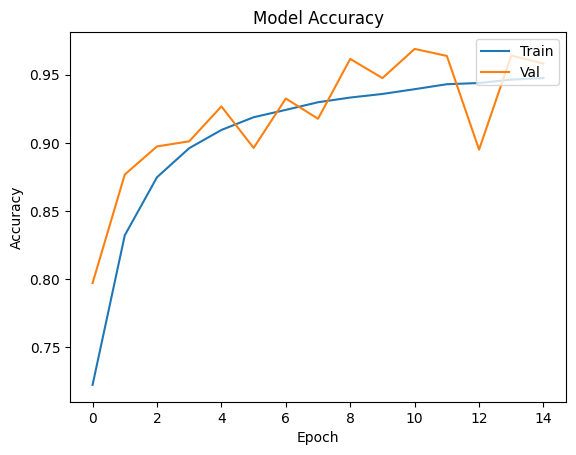

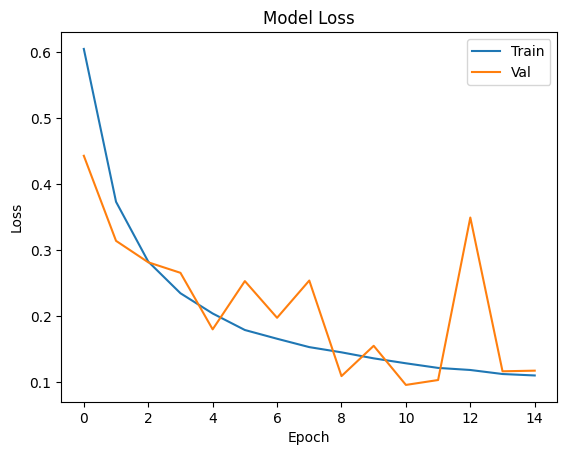

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [49]:
test_loss, test_acc = model.evaluate(test_set)

313/313 [==============================] - 61s 196ms/step - loss: 0.1125 - accuracy: 0.9606


In [50]:
model.save('cnn__model_final.h5')

In [51]:
print("test_loss",test_loss,"test_acc", test_acc)

test_loss 0.11246708780527115 test_acc 0.9606000185012817


In [52]:
from tensorflow import keras

# Load the model from the H5 file
model = keras.models.load_model('cnn__model_final.h5')

In [53]:
%%time
history = model.fit(training_set, validation_data = validation_set, epochs = epochs, validation_steps = 100, verbose=1)

Epoch 1/15
1760/1760 [==============================] - 1342s 762ms/step - loss: 0.1043 - accuracy: 0.9487 - val_loss: 0.1362 - val_accuracy: 0.9523
Epoch 2/15
1760/1760 [==============================] - 1320s 750ms/step - loss: 0.1040 - accuracy: 0.9493 - val_loss: 0.1297 - val_accuracy: 0.9508
Epoch 3/15
1760/1760 [==============================] - 1318s 749ms/step - loss: 0.0985 - accuracy: 0.9521 - val_loss: 0.1035 - val_accuracy: 0.9689
Epoch 4/15
1760/1760 [==============================] - 1318s 749ms/step - loss: 0.0970 - accuracy: 0.9519 - val_loss: 0.1518 - val_accuracy: 0.9584
Epoch 5/15
1760/1760 [==============================] - 1320s 750ms/step - loss: 0.0934 - accuracy: 0.9541 - val_loss: 0.1257 - val_accuracy: 0.9670
Epoch 6/15
1760/1760 [==============================] - 1319s 749ms/step - loss: 0.0917 - accuracy: 0.9562 - val_loss: 0.0994 - val_accuracy: 0.9723
Epoch 7/15
1760/1760 [==============================] - 1322s 751ms/step - loss: 0.0896 - accuracy: 0.9567

In [54]:
model.save('cnn__model_final_2.h5')

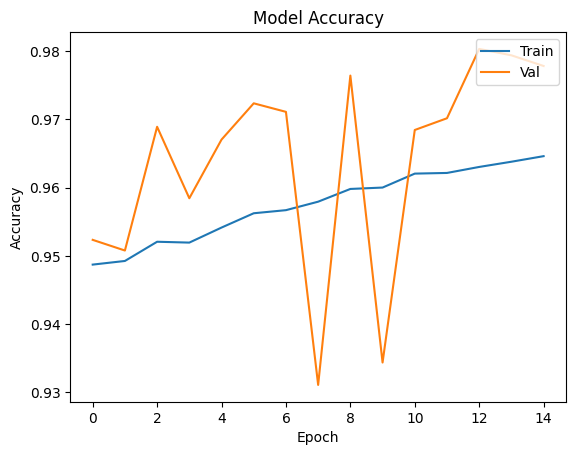

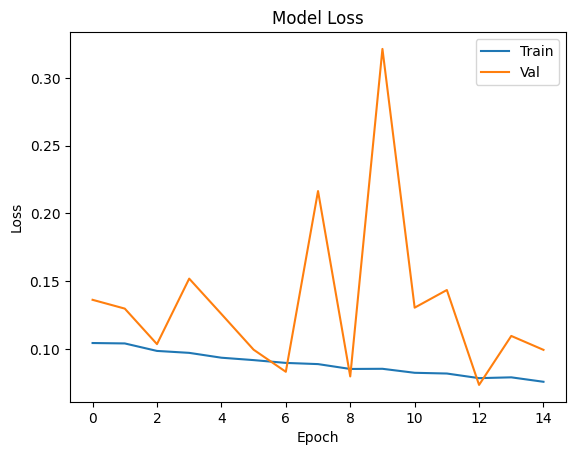

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [59]:
model = keras.models.load_model('cnn__model_final.h5')

In [64]:
# from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
# import itertools
# from itertools import cycle
# from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

# # Assuming you have defined `model` and `val_test_datagen` variables before this point

# test_set = val_test_datagen.flow_from_directory(path + '/test',
#                                                class_mode='binary',
#                                                shuffle=True,
#                                                target_size=(row, col),
#                                                batch_size=bs)

# predictions = model.predict(test_set)
# pred_labels = np.argmax(predictions, axis=1)

# print(classification_report(test_set.classes, pred_labels))

# print(confusion_matrix(test_set.classes, pred_labels))
# tn, fp, fn, tp = confusion_matrix(test_set.classes, pred_labels, labels=[0, 1]).ravel()

# print('TP', tp, '\nTN', tn, '\nFP', fp, '\nFN', fn)

# print('\nTPR', round(tp / (tp + fn), 4))
# print('FNR', round(fn / (fn + tp), 4))
# print('FPR', round(fp / (fp + tn), 4))
# print('TNR', round(tn / (tn + fp), 4))
# print('\nAccuracy:', round(accuracy_score(test_set.classes, pred_labels), 4))
# print('F1-score', round(2 * tp / (2 * tp + fp + fn), 3))


In [65]:
# from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
# import itertools
# from itertools import cycle
# from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

# # Assuming you have defined `model` and `val_test_datagen` variables before this point

# test_set = val_test_datagen.flow_from_directory(path + '/valid',
#                                                class_mode='binary',
#                                                shuffle=True,
#                                                target_size=(row, col),
#                                                batch_size=bs)

# predictions = model.predict(test_set)
# pred_labels = np.argmax(predictions, axis=1)

# print(classification_report(test_set.classes, pred_labels))

# print(confusion_matrix(test_set.classes, pred_labels))
# tn, fp, fn, tp = confusion_matrix(test_set.classes, pred_labels, labels=[0, 1]).ravel()

# print('TP', tp, '\nTN', tn, '\nFP', fp, '\nFN', fn)

# print('\nTPR', round(tp / (tp + fn), 4))
# print('FNR', round(fn / (fn + tp), 4))
# print('FPR', round(fp / (fp + tn), 4))
# print('TNR', round(tn / (tn + fp), 4))
# print('\nAccuracy:', round(accuracy_score(test_set.classes, pred_labels), 4))
# print('F1-score', round(2 * tp / (2 * tp + fp + fn), 3))


## Model Architecture

In [23]:
# import os, datetime

# import tensorflow as tf
# from tensorflow.keras.utils import load_img
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import plot_model

# from PIL import Image
# import matplotlib.pyplot as plt

# import pydotplus
# import pydot
     

In [24]:
# tf.keras.utils.pydot = pydot

In [25]:
# plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
# dataset_url = "https://www.kaggle.com/sophatvathana/casia-dataset"
     

In [43]:
# od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: orgamer
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 5.22G/5.22G [05:17<00:00, 17.6MB/s]


In [26]:
# import numpy as np 
# import pandas as pd 
# import matplotlib.pyplot as plt2
# import os
# import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import (Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout)
# from tensorflow.keras.optimizers import RMSprop, Adam, SGD
# from keras import regularizers
# from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau

In [27]:
# from PIL import Image, ImageChops, ImageEnhance
# import os
# import itertools

In [28]:

# def convert_to_ela_image(path, quality):
#     temp_filename = 'temp_file_name.jpg'
#     ela_filename = 'temp_ela.png'
    
#     image = Image.open(path).convert('RGB')
#     image.save(temp_filename, 'JPEG', quality = quality)
#     temp_image = Image.open(temp_filename)
    
#     ela_image = ImageChops.difference(image, temp_image)
    
#     extrema = ela_image.getextrema()
#     max_diff = max([ex[1] for ex in extrema])
#     if max_diff == 0:
#         max_diff = 1
#     scale = 255.0 / max_diff
    
#     ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
#     return ela_image

In [46]:
# image_size = (128, 128)

In [30]:

# def prepare_image(image_path):
#     return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [31]:

# X = [] # ELA converted images
# Y = [] # 0 for fake, 1 for real
     

In [32]:
# import os
# import random

# path = r'C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au'
# X = []  # List to store image data
# Y = []  # List to store labels

# for dirname, _, filenames in os.walk(path):
#     for filename in filenames:
#         if filename.endswith('jpg') or filename.endswith('png'):
#             full_path = os.path.join(dirname, filename)
#             print(full_path)
#             X.append(prepare_image(full_path))
#             Y.append(1)
#             if len(Y) % 500 == 0:
#                 print(f'Processing {len(Y)} images')

# random.shuffle(X)
# X = X[:2100]
# Y = Y[:2100]
# print(len(X), len(Y))

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00001.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00002.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00003.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00004.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00005.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00006.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00007.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00008.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00009.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00010.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00011.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00099.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_00100.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10003.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10004.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10005.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10101.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10102.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10103.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10104.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10105.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10106.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10206.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10207.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10208.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10209.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10210.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10211.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10212.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10213.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10214.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10215.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_10216.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30009.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30010.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30011.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30012.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30013.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30014.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30015.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30016.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30017.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30018.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30019.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30109.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30110.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30111.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30112.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30113.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30114.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30115.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30116.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30117.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30118.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30119.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30204.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30205.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30206.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30207.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30208.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30209.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30210.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30211.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30212.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30213.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30214.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30302.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30303.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30304.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30305.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30306.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30307.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30308.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30309.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30310.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30311.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30312.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30403.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30404.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30405.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30406.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30407.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30408.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30409.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30410.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30411.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30412.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30413.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30500.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30501.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30502.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30503.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30504.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30505.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30506.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30507.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30508.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30509.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30510.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30604.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30605.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30606.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30607.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30608.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30609.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30610.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30611.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30612.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30613.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30614.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30696.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30697.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30698.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30699.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30700.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30701.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30702.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30703.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30704.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30705.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30706.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30789.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30790.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30791.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30792.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30793.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30794.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30795.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ani_30796.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00001.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00002.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00003.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00087.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00088.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00089.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00090.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00091.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00092.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00093.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00094.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00095.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00096.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_00097.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20060.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20061.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20062.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20063.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20064.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20065.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20066.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20067.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20068.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20069.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_20070.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30054.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30055.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30056.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30057.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30058.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30059.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30060.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30061.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30062.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30063.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30064.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30152.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30153.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30154.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30155.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30156.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30157.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30158.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30159.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30160.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30161.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30162.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30246.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30247.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30248.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30249.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30250.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30251.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30252.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30253.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30254.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30255.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30256.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30340.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30341.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30342.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30343.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30344.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30345.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30346.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30347.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30348.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30349.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30350.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30433.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30434.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30435.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30436.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30437.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30438.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30439.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30440.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30441.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30442.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30443.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30537.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30538.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30539.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30540.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30541.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30542.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30543.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30544.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30545.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30546.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30547.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30629.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30630.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30631.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30632.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30633.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30634.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30635.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30636.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30637.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30638.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30639.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30722.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30723.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30724.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30725.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30726.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30727.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30728.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30729.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30730.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30731.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30732.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30821.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30822.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30823.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30824.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30825.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30826.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30827.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30828.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30829.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30830.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_arc_30831.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00072.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00073.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00074.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00075.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00076.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00077.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00078.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00079.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00080.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00081.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_00082.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20045.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20046.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20047.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20048.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20049.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20050.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20051.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20052.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20053.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20054.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_20055.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30048.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30049.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30050.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30051.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30052.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30053.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30054.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30055.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30056.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30057.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30058.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30151.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30152.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30153.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30154.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30155.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30156.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30157.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30158.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30159.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30160.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30161.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30249.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30250.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30251.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30252.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30253.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30254.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30255.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30256.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30257.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30258.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30259.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30348.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30349.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30350.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30351.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30352.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30353.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30354.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30355.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30356.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30357.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30358.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30446.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30447.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30448.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30449.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30450.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30451.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30452.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30453.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30454.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30455.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30456.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30544.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30545.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30546.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30547.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30548.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30549.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30550.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30551.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30552.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30553.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30554.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30641.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30642.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30643.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30644.jpg
Processing 3000 images
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30645.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30646.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30647.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30648.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30649.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_art_30650.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00048.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00049.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00050.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00051.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00052.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00053.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00054.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00055.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00056.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00057.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_00058.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10152.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10153.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10154.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10155.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10156.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10157.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10158.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10159.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10160.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10161.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_10162.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_20041.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_20042.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_20043.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_20044.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_20045.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_20046.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_20047.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_20048.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30001.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30002.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30003.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30085.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30086.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30087.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30088.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30089.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30090.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30091.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30092.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30093.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30094.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30095.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30187.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30188.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30189.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30190.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30191.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30192.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30193.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30194.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30195.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30196.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30197.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30283.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30284.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30285.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30286.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30287.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30288.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30289.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30290.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30291.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30292.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30293.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30380.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30381.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30382.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30383.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30384.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30385.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30386.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30387.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30388.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30389.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30390.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30476.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30477.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30478.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30479.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30480.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30481.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30482.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30483.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30484.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30485.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30486.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30574.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30575.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30576.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30577.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30578.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30579.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30580.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30581.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30582.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30583.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30584.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30668.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30669.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30670.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30671.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30672.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30673.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30674.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30675.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30676.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30677.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_cha_30678.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00042.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00043.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00044.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00045.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00046.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00047.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00048.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00049.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00050.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00051.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_00052.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20033.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20034.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20035.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20036.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20037.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20038.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20039.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20040.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20041.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20042.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_20043.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30072.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30073.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30074.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30075.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30076.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30077.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30078.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30079.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30080.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30081.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_ind_30082.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00002.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00003.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00004.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00005.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00006.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00007.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00008.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00009.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00010.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00011.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_00012.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_10003.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_10101.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_10102.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_10103.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20001.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20002.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20003.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20004.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20005.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20006.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20007.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20092.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20093.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20094.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20095.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20096.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20097.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20098.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20099.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_20100.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30001.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30002.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30095.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30096.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30097.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30098.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30099.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30100.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30101.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30102.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30103.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30104.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30105.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30191.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30192.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30193.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30194.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30195.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30196.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30197.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30198.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30199.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30200.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30201.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30285.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30286.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30287.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30288.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30289.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30290.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30291.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30292.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30293.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30294.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30295.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30389.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30390.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30391.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30392.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30393.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30394.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30395.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30396.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30397.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30398.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30399.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30481.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30482.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30483.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30484.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30485.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30486.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30487.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30488.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30489.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30490.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30491.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30576.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30577.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30578.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30579.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30580.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30581.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30582.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30583.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30584.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30585.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30586.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30673.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30674.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30675.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30676.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30677.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30678.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30679.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30680.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30681.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30682.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_nat_30683.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00033.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00034.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00035.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00036.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00037.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00038.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00039.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00040.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00041.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00042.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_00043.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20008.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20009.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20010.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20011.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20012.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20013.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20014.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20015.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20016.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20017.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_20018.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30002.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30003.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30004.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30005.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30006.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30007.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30008.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30009.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30010.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30011.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30012.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30097.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30098.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30099.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30100.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30101.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30102.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30103.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30104.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30105.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30106.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30107.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30193.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30194.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30195.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30196.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30197.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30198.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30199.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30200.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30201.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30202.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30203.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30296.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30297.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30298.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30299.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30300.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30301.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30302.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30303.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30304.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30305.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30306.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30399.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30400.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30401.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30402.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30403.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30404.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30405.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30406.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30407.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30408.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30409.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30494.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30495.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30496.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30497.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30498.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30499.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30500.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30501.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30502.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30503.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30504.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30597.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30598.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30599.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30600.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30601.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30602.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30603.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30604.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30605.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30606.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30607.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30689.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30690.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30691.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30692.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30693.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30694.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30695.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30696.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30697.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30698.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_pla_30699.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00048.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00049.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00050.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00051.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00052.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00053.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00054.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00055.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00056.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00057.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_00058.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20035.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20036.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20037.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20038.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20039.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20040.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20041.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20042.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20043.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20044.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_20045.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30037.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30038.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30039.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30040.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30041.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30042.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30043.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30044.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30045.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30046.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30047.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30140.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30141.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30142.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30143.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30144.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30145.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30146.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30147.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30148.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30149.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30150.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30239.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30240.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30241.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30242.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30243.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30244.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30245.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30246.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30247.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30248.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30249.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30334.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30335.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30336.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30337.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30338.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30339.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30340.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30341.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30342.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30343.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30344.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30432.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30433.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30434.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30435.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30436.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30437.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30438.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30439.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30440.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30441.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30442.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30533.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30534.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30535.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30536.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30537.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30538.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30539.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30540.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30541.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30542.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30543.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30638.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30639.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30640.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30641.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30642.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30643.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30644.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30645.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30646.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30647.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_sec_30648.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00005.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00006.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00007.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00008.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00009.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00010.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00011.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00012.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00013.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00014.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_00015.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10102.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10103.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10104.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10105.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10106.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10107.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10108.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10109.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10110.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10111.jpg
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\Au_txt_10112.jpg
C:\Users\a

C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\genuine-type01b-015.png
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\genuine-type01b-016.png
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\genuine-type01b-017.png
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\genuine-type01b-018.png
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\genuine-type01b-019.png
C:\Users\atulp\Desktop\final ocr model file\image manipulation\CASIA2\Au\genuine-type01b-020.png
2100 2100


In [53]:
# import os
# import random

# path = r'C:\Users\atulp\Desktop\final ocr model file\image manipulation\casia-dataset\casia\CASIA2\Tp'
# X = []  # List to store image data
# Y = []  # List to store labels

# for dirname, _, filenames in os.walk(path):
#     for filename in filenames:
#         if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('.tif'):
#             full_path = os.path.join(dirname, filename)
# #             print(full_path)
#             X.append(prepare_image(full_path))
#             Y.append(0)
#             if len(Y) % 500 == 0:
#                 print(f'Processing {len(Y)} images')


# print(len(X), len(Y))

Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
5123 5123


In [62]:
# path = '/casia-dataset/CASIA2/Tp/'
# for dirname, _, filenames in os.walk(path):
#     for filename in filenames:
#         if filename.endswith('jpg') or filename.endswith('png'):
#             full_path = os.path.join(dirname, filename)
#             X.append(prepare_image(full_path))
#             Y.append(0)
#             if len(Y) % 500 == 0:
#                 print(f'Processing {len(Y)} images')

# print(len(X), len(Y))

In [54]:
# #import necessary libraries
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# np.random.seed(2)
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from keras.utils.np_utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
# from tensorflow.keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import EarlyStopping

In [55]:

# X = np.array(X)
# Y = to_categorical(Y, 2)
# X = X.reshape(-1, 128, 128, 3)

In [56]:
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
# X = X.reshape(-1,1,1,1)
# print(len(X_train), len(Y_train))
# print(len(X_val), len(Y_val))
     

4098 4098
1025 1025


In [57]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [58]:

# hist = model.fit(X_train,
#                  Y_train,
#                  batch_size = batch_size,
#                  epochs = epochs,
#                 validation_data = (X_val, Y_val),
#                  verbose = 1, 
#                 callbacks = callbacks)

Epoch 1/15
65/65 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9963WARNING:tensorflow:5 out of the last 5 calls to <function Model.make_test_function.<locals>.test_function at 0x000002470657DCF0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

Epoch 1: val_loss improved from inf to 0.00000, saving model to /content/Model_weights\MiniNet.h5
65/65 [==============================] - 40s 575ms/step - loss: 0.0172 - accuracy: 0.9963 - val_loss: 0.0000e+00

In [61]:
# model.save('model7.h5')

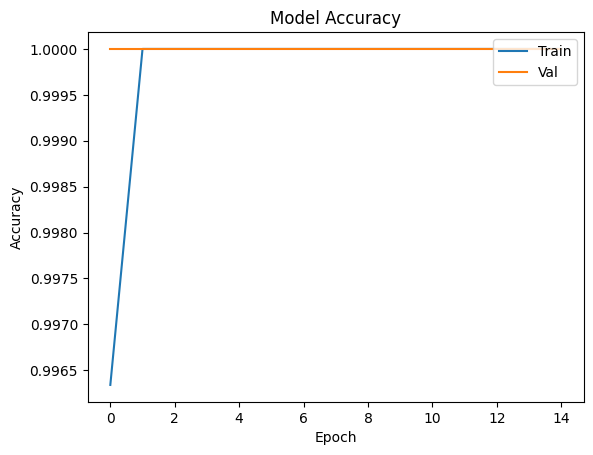

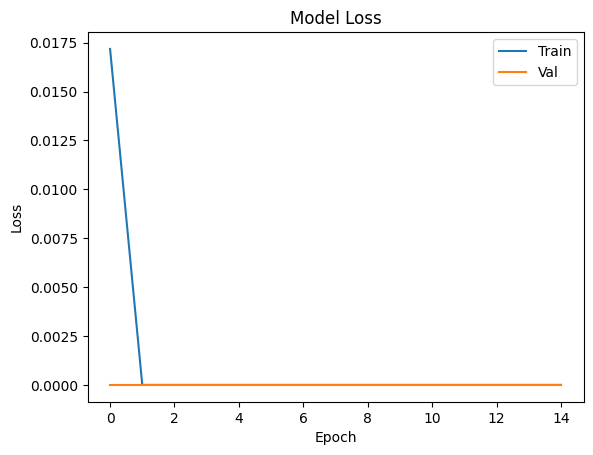

In [62]:
# plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()


# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()

In [63]:
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

33/33 [==============================] - 2s 60ms/step


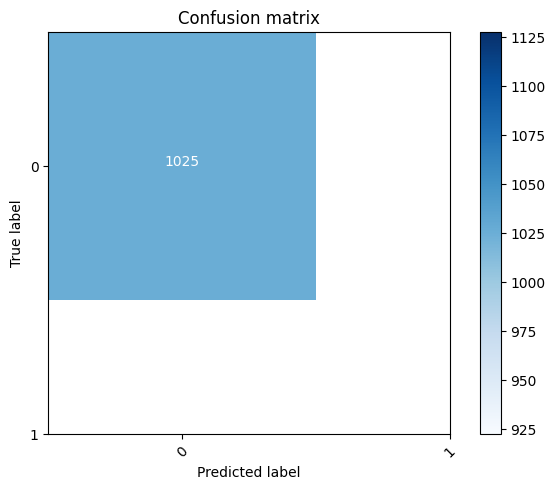

In [64]:

# # Predict the values from the validation dataset
# Y_pred = model.predict(X_val)
# # Convert predictions classes to one hot vectors 
# Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# # Convert validation observations to one hot vectors
# Y_true = np.argmax(Y_val,axis = 1) 
# # compute the confusion matrix
# confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# # plot the confusion matrix
# plot_confusion_matrix(confusion_mtx, classes = range(2))

In [65]:
# class_names = ['fake', 'real']

In [66]:

# fake_image = os.listdir('C:\\Users\\atulp\\Desktop\\final ocr model file\\image manipulation\\casia-dataset\\casia\\CASIA2\\Tp')
# correct = 0
# total = 0
# for file_name in fake_image:
#     if file_name.endswith('jpg') or filename.endswith('png'):
#         fake_image_path = os.path.join('C:\\Users\\atulp\\Desktop\\final ocr model file\\image manipulation\\casia-dataset\\casia\\CASIA2\\Tp\\', file_name)
#         image = prepare_image(fake_image_path)
#         image = image.reshape(-1, 128, 128, 3)
#         y_pred = model.predict(image)
#         y_pred_class = np.argmax(y_pred, axis = 1)[0]
#         total += 1
#         if y_pred_class == 0:
#             correct += 1

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


In [67]:
# print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 2064, Correct: 2064, Acc: 100.0


In [68]:
# real_image = os.listdir('C:\\Users\\atulp\\Desktop\\final ocr model file\\image manipulation\\casia-dataset\\casia\\CASIA2\\Au')
# correct_r = 0
# total_r = 0
# for file_name in real_image:
#     if file_name.endswith('jpg') or filename.endswith('png'):
#         real_image_path = os.path.join('C:\\Users\\atulp\\Desktop\\final ocr model file\\image manipulation\\casia-dataset\\casia\\CASIA2\\Au\\', file_name)
#         image = prepare_image(real_image_path)
#         image = image.reshape(-1, 128, 128, 3)
#         y_pred = model.predict(image)
#         y_pred_class = np.argmax(y_pred, axis = 1)[0]
#         total_r += 1
#         if y_pred_class == 1:
#             correct_r += 1
     

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


In [ ]:

# correct += correct_r
# total += total_r
# print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
# print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')
     

In [ ]:
# print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
# print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

In [71]:
# total_r

7354

In [ ]:
# check demo

In [72]:
image_size = (128, 128)
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [73]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [74]:
from tensorflow import keras
import numpy as np
from PIL import Image
from PIL import Image, ImageChops, ImageEnhance

# Assuming you have loaded your model and have test data available
model = keras.models.load_model('model.h5')
real_image_path=input(print("enter image"))
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)

y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred)




enter image
NoneD:/hackathone/dataset-doctor-bills/genuine/type01/type01a/genuine-type01a-001.png
1/1 [==============================] - 0s 110ms/step


In [78]:
# import pickle

# # Assuming you have a trained model object named 'model'
# # Save the model to a PK file
# with open('model.pk', 'wb') as file:
#     pickle.dump(model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...layers\max_pooling2d_3
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
........

In [77]:
print("predclass", y_pred_class)


predclass 0


In [ ]:
# D:/hackathone/dataset-doctor-bills/genuine/type01/type01a/genuine-type01a-001.png

In [ ]:
# D:/hackathone/dataset-doctor-bills/fake/forged-type01-002.tif
    